In [12]:
# Import tools we'll need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Make plots show up in the notebook
%matplotlib inline

# Set style for prettier plots
sns.set_style('whitegrid')

# Load the data (this might take 10-20 seconds - it's a large file)
print("Loading data... (this may take a moment)")
df = pd.read_csv('../data/raw/creditcard.csv')
print("✓ Data loaded successfully!")

# Look at basic info
print("\n" + "="*70)
print("DATASET OVERVIEW")
print("="*70)
print(f"Dataset shape: {df.shape}")
print(f"Total transactions: {len(df):,}")
print(f"Total features: {df.shape[1]}")

print("\n" + "="*70)
print("FIRST 5 TRANSACTIONS")
print("="*70)
print(df.head())

Loading data... (this may take a moment)
✓ Data loaded successfully!

DATASET OVERVIEW
Dataset shape: (284807, 31)
Total transactions: 284,807
Total features: 31

FIRST 5 TRANSACTIONS
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.3774

In [13]:
# Header
print("="*70)
print("DATA INFORMATION")
print("="*70)
print(df.info())

# Check for Missing Data
print("\n" + "="*70)
print("MISSING VALUES CHECK")
print("="*70)
missing = df.isnull().sum()
print(f"Total missing values: {missing.sum()}")
if missing.sum() == 0:
    print("✓ No missing values - data is clean!")

# Counting Frauds vs Legitimate
print("\n" + "="*70)
print("FRAUD DISTRIBUTION (THE EXTREME IMBALANCE)")
print("="*70)
class_dist = df['Class'].value_counts()
print(class_dist)

# Calculating Percentage
fraud_percentage = (class_dist[1] / len(df)) * 100
# Displaying Statistics
print(f"\nLegitimate transactions: {class_dist[0]:,} ({100-fraud_percentage:.3f}%)")
print(f"Fraudulent transactions: {class_dist[1]:,} ({fraud_percentage:.3f}%)")
# Imbalance Ratio
print(f"\nWARNING:  Fraud Rate: {fraud_percentage:.3f}%")
print(f"   Imbalance Ratio: {class_dist[0]/class_dist[1]:.0f}:1")
print(f"   This means for every fraud, there are {class_dist[0]/class_dist[1]:.0f} legitimate transactions!")

# Statistical Summary
print("\n" + "="*70)
print("STATISTICAL SUMMARY")
print("="*70)
print(df.describe())

DATA INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float6

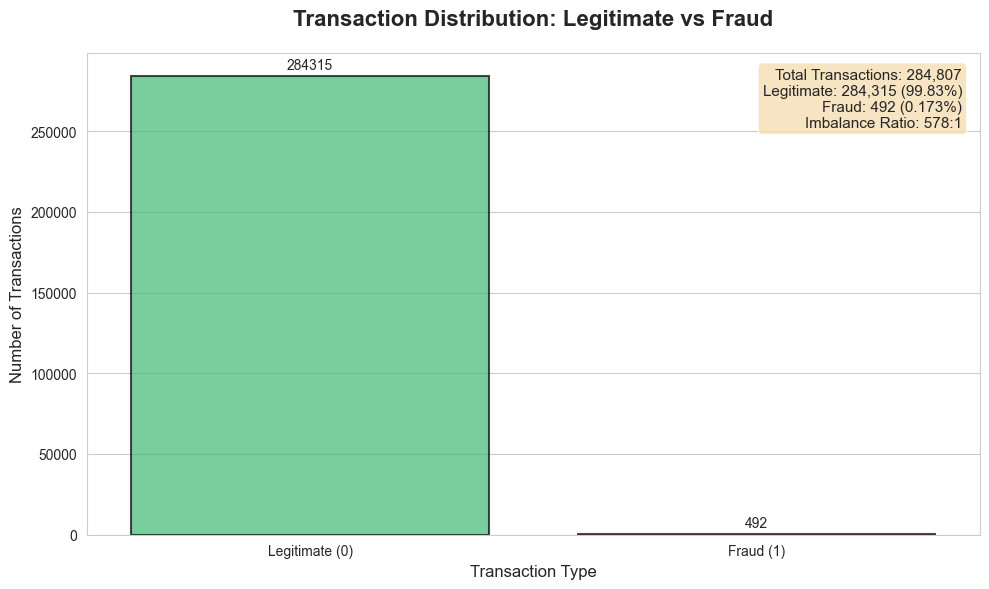

KEY INSIGHT:
   This extreme 578:1 imbalance is the main challenge.
   A model that predicts 'all legitimate' would be 99.83% accurate
   but completely useless for catching fraud!

CLASS IMBALANCE SUMMARY
 Imbalance Ratio: 577.9:1
 Normal transactions: 284,315 (99.83%)
 Fraud transactions: 492 (0.17%)

 This extreme imbalance requires special handling:
   - Use techniques like SMOTE, undersampling, or class weights
   - Accuracy alone won't work - use precision, recall, F1-score


In [14]:
# CHART 1: CLASS IMBALANCE ANALYSIS

# Create canvas and count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Class', palette=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black', linewidth=1.5)

# Add chart labels and formatting
plt.title('Transaction Distribution: Legitimate vs Fraud', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks([0, 1], ['Legitimate (0)', 'Fraud (1)'])

# Add count numbers on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

# Calculate fraud statistics
fraud_count = df['Class'].sum()
legit_count = len(df) - fraud_count
fraud_pct = (fraud_count / len(df)) * 100

# Build text for statistics box
textstr = f'Total Transactions: {len(df):,}\n'
textstr += f'Legitimate: {legit_count:,} ({100-fraud_pct:.2f}%)\n'
textstr += f'Fraud: {fraud_count:,} ({fraud_pct:.3f}%)\n'
textstr += f'Imbalance Ratio: {legit_count/fraud_count:.0f}:1'

# Create and place statistics box on chart
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.98, 0.97, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', horizontalalignment='right', bbox=props)

# Save and display chart
plt.tight_layout()
plt.savefig('../images/fraud_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Print key insights
print("KEY INSIGHT:")
print(f"   This extreme {legit_count/fraud_count:.0f}:1 imbalance is the main challenge.")
print("   A model that predicts 'all legitimate' would be 99.83% accurate")
print("   but completely useless for catching fraud!")

print("\n" + "="*70)
print("CLASS IMBALANCE SUMMARY")
print("="*70)
print(f" Imbalance Ratio: {len(df[df['Class']==0]) / len(df[df['Class']==1]):.1f}:1")
print(f" Normal transactions: {len(df[df['Class']==0]):,} ({len(df[df['Class']==0])/len(df)*100:.2f}%)")
print(f" Fraud transactions: {len(df[df['Class']==1]):,} ({len(df[df['Class']==1])/len(df)*100:.2f}%)")
print(f"\n This extreme imbalance requires special handling:")
print(f"   - Use techniques like SMOTE, undersampling, or class weights")
print(f"   - Accuracy alone won't work - use precision, recall, F1-score")
print("="*70)

In [15]:
# BIN VERIFICATION

import numpy as np

# Get the transaction amounts
legit_amounts = df[df['Class']==0]['Amount']
fraud_amounts = df[df['Class']==1]['Amount']

# Manually create histogram data for both
legit_counts, bin_edges = np.histogram(legit_amounts, bins=50, range=(0, 500))
fraud_counts, _ = np.histogram(fraud_amounts, bins=50, range=(0, 500))

# Legitimate bins
print("="*70)
print("LEGITIMATE TRANSACTION BINS")
print("="*70)
print(f"\nTotal bins created: {len(legit_counts)}")
print(f"Bin width: €{bin_edges[1] - bin_edges[0]:.2f}")

print("\nFirst 10 bins (each is €10 wide):")
for i in range(10):
    print(f"Bin {i+1:2d} (€{bin_edges[i]:6.2f} - €{bin_edges[i+1]:6.2f}): {legit_counts[i]:>8,} transactions")

print("\nLast 10 bins:")
for i in range(40, 50):
    print(f"Bin {i+1:2d} (€{bin_edges[i]:6.2f} - €{bin_edges[i+1]:6.2f}): {legit_counts[i]:>8,} transactions")

print(f"\nBins with data: {np.sum(legit_counts > 0)} out of 50")
print(f"Empty bins: {np.sum(legit_counts == 0)} out of 50")

# Fraudulent bins
print("\n" + "="*70)
print("FRAUDULENT TRANSACTION BINS")
print("="*70)
print(f"\nTotal bins created: {len(fraud_counts)}")
print(f"Bin width: €{bin_edges[1] - bin_edges[0]:.2f}")

print("\nFirst 10 bins (each is €10 wide):")
for i in range(10):
    print(f"Bin {i+1:2d} (€{bin_edges[i]:6.2f} - €{bin_edges[i+1]:6.2f}): {fraud_counts[i]:>8,} transactions")

print("\nLast 10 bins:")
for i in range(40, 50):
    print(f"Bin {i+1:2d} (€{bin_edges[i]:6.2f} - €{bin_edges[i+1]:6.2f}): {fraud_counts[i]:>8,} transactions")

print(f"\nBins with data: {np.sum(fraud_counts > 0)} out of 50")
print(f"Empty bins: {np.sum(fraud_counts == 0)} out of 50")

LEGITIMATE TRANSACTION BINS

Total bins created: 50
Bin width: €10.00

First 10 bins (each is €10 wide):
Bin  1 (€  0.00 - € 10.00):   97,065 transactions
Bin  2 (€ 10.00 - € 20.00):   39,792 transactions
Bin  3 (€ 20.00 - € 30.00):   22,934 transactions
Bin  4 (€ 30.00 - € 40.00):   16,306 transactions
Bin  5 (€ 40.00 - € 50.00):   13,302 transactions
Bin  6 (€ 50.00 - € 60.00):   10,424 transactions
Bin  7 (€ 60.00 - € 70.00):    8,295 transactions
Bin  8 (€ 70.00 - € 80.00):    7,369 transactions
Bin  9 (€ 80.00 - € 90.00):    6,283 transactions
Bin 10 (€ 90.00 - €100.00):    5,290 transactions

Last 10 bins:
Bin 41 (€400.00 - €410.00):      462 transactions
Bin 42 (€410.00 - €420.00):      363 transactions
Bin 43 (€420.00 - €430.00):      308 transactions
Bin 44 (€430.00 - €440.00):      356 transactions
Bin 45 (€440.00 - €450.00):      305 transactions
Bin 46 (€450.00 - €460.00):      334 transactions
Bin 47 (€460.00 - €470.00):      271 transactions
Bin 48 (€470.00 - €480.00):   

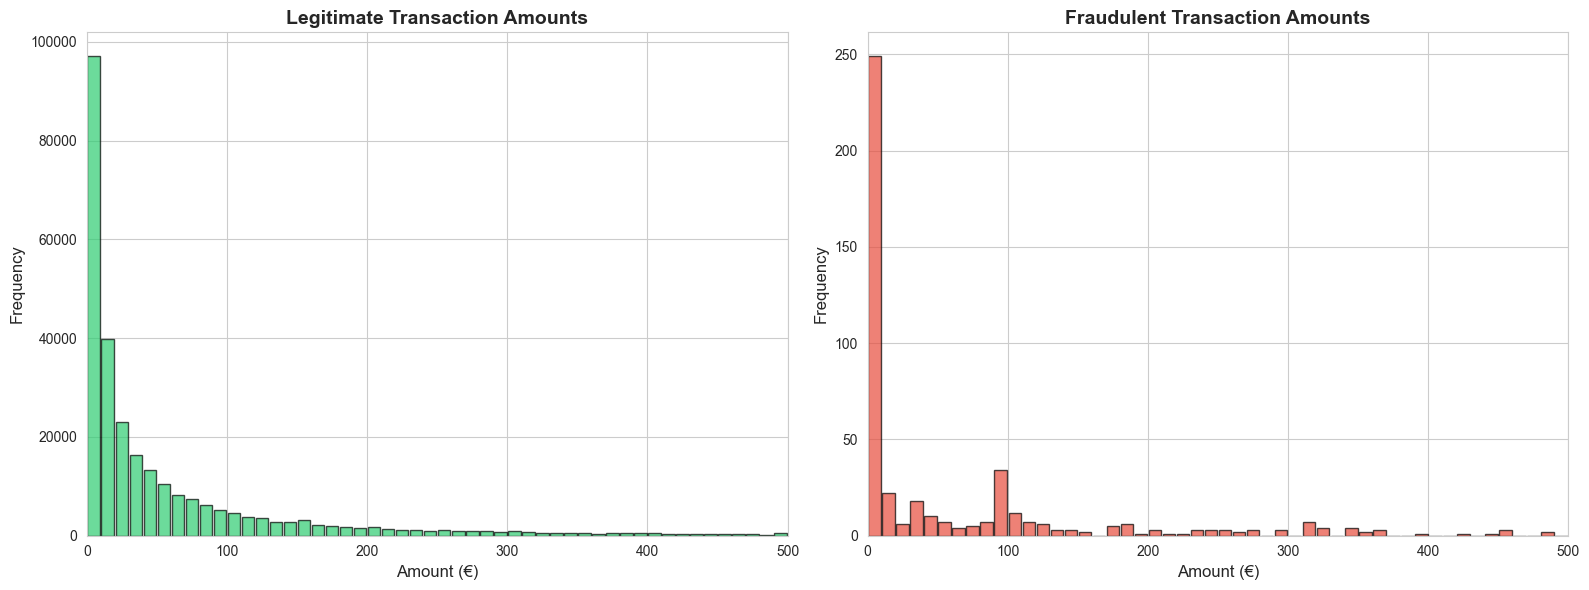


TRANSACTION AMOUNT STATISTICS

 LEGITIMATE TRANSACTIONS:
   Count:    284,315
   Average:  €88.29
   Median:   €22.00
   Std Dev:  €250.11
   Range:    €0.00 - €25691.16

 FRAUDULENT TRANSACTIONS:
   Count:    492
   Average:  €122.21
   Median:   €9.25
   Std Dev:  €256.68
   Range:    €0.00 - €2125.87

AMOUNT DISTRIBUTION SUMMARY
 COMPARISON:
   ⬆️  Fraudulent transactions are HIGHER on average by €33.92
   ⬇️  Fraudulent median is LOWER by €12.75

 KEY INSIGHTS:
   • Fraud has 1.03x the variability of normal transactions
   • 73.6% of frauds are under €100
   • 79.9% of normal transactions are under €100

 MODELING IMPLICATION:
   ⚠️  Amount distributions overlap significantly!
   ⚠️  Amount ALONE is NOT a strong fraud predictor
   ✅ Must combine with V-features for accurate detection


In [16]:
# CHART 2: TRANSACTION AMOUNT DISTRIBUTION ANALYSIS

# Manually create the histogram data
legit_counts, bin_edges = np.histogram(df[df['Class']==0]['Amount'], bins=50, range=(0, 500))
fraud_counts, _ = np.histogram(df[df['Class']==1]['Amount'], bins=50, range=(0, 500))

# Calculate bin centers for x-axis positioning
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_width = bin_edges[1] - bin_edges[0]

# Create canvas with 2 side-by-side charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# LEFT: Legitimate transactions as manual bars
axes[0].bar(bin_centers, legit_counts, width=bin_width*0.9, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[0].set_title('Legitimate Transaction Amounts', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Amount (€)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_xlim([0, 500])

# RIGHT: Fraudulent transactions as manual bars
axes[1].bar(bin_centers, fraud_counts, width=bin_width*0.9, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[1].set_title('Fraudulent Transaction Amounts', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Amount (€)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_xlim([0, 500])

# Save and display charts
plt.tight_layout()
plt.savefig('../images/amount_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# AMOUNT DISTRIBUTION ANALYSIS
# ============================================================================

# Calculate statistics for both classes
fraud_amounts = df[df['Class']==1]['Amount']
normal_amounts = df[df['Class']==0]['Amount']

print("\n" + "="*70)
print("TRANSACTION AMOUNT STATISTICS")
print("="*70)

print("\n LEGITIMATE TRANSACTIONS:")
print(f"   Count:    {len(normal_amounts):,}")
print(f"   Average:  €{normal_amounts.mean():.2f}")
print(f"   Median:   €{normal_amounts.median():.2f}")
print(f"   Std Dev:  €{normal_amounts.std():.2f}")
print(f"   Range:    €{normal_amounts.min():.2f} - €{normal_amounts.max():.2f}")

print("\n FRAUDULENT TRANSACTIONS:")
print(f"   Count:    {len(fraud_amounts):,}")
print(f"   Average:  €{fraud_amounts.mean():.2f}")
print(f"   Median:   €{fraud_amounts.median():.2f}")
print(f"   Std Dev:  €{fraud_amounts.std():.2f}")
print(f"   Range:    €{fraud_amounts.min():.2f} - €{fraud_amounts.max():.2f}")

print("\n" + "="*70)
print("AMOUNT DISTRIBUTION SUMMARY")
print("="*70)

# Calculate differences
avg_diff = fraud_amounts.mean() - normal_amounts.mean()
median_diff = fraud_amounts.median() - normal_amounts.median()

print(f" COMPARISON:")
if fraud_amounts.mean() > normal_amounts.mean():
    print(f"   ⬆️  Fraudulent transactions are HIGHER on average by €{abs(avg_diff):.2f}")
else:
    print(f"   ⬇️  Fraudulent transactions are LOWER on average by €{abs(avg_diff):.2f}")

if fraud_amounts.median() > normal_amounts.median():
    print(f"   ⬆️  Fraudulent median is HIGHER by €{abs(median_diff):.2f}")
else:
    print(f"   ⬇️  Fraudulent median is LOWER by €{abs(median_diff):.2f}")

# Distribution insights
print(f"\n KEY INSIGHTS:")
print(f"   • Fraud has {fraud_amounts.std()/normal_amounts.std():.2f}x the variability of normal transactions")
print(f"   • {len(fraud_amounts[fraud_amounts < 100])/len(fraud_amounts)*100:.1f}% of frauds are under €100")
print(f"   • {len(normal_amounts[normal_amounts < 100])/len(normal_amounts)*100:.1f}% of normal transactions are under €100")

print(f"\n MODELING IMPLICATION:")
if abs(avg_diff) < 50:
    print(f"   ⚠️  Amount distributions overlap significantly!")
    print(f"   ⚠️  Amount ALONE is NOT a strong fraud predictor")
    print(f"   ✅ Must combine with V-features for accurate detection")
else:
    print(f"   ✅ Amount shows clear separation between fraud and normal")
    print(f"   ✅ This feature will be useful for the model")

print("="*70)



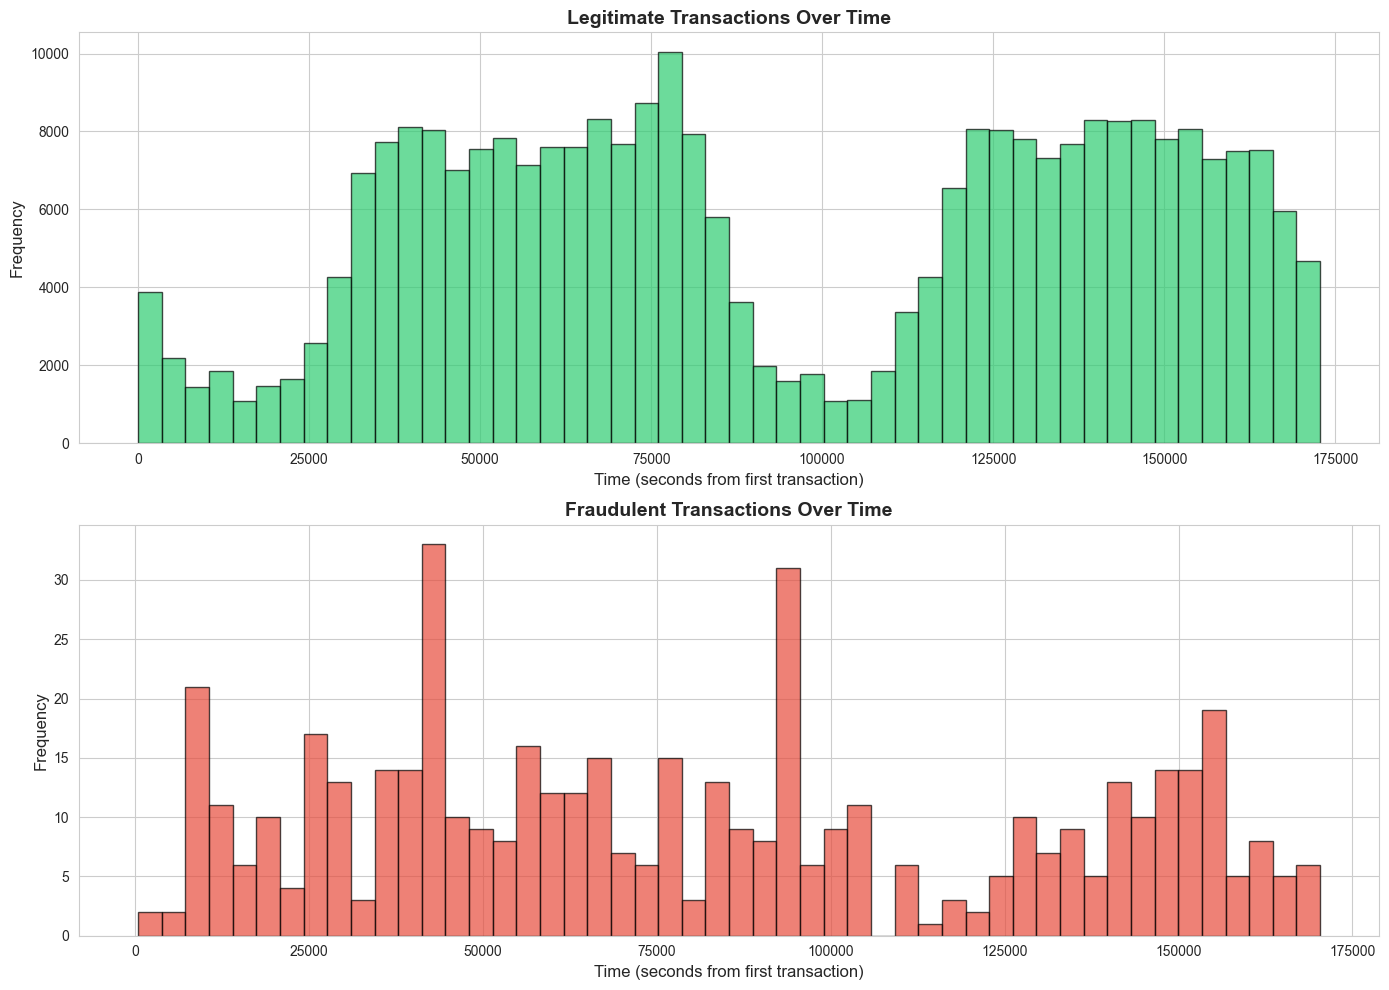


TIME PATTERN STATISTICS

Note: Time represents seconds elapsed in the dataset (2 days of transactions)

 Average Transaction Times:
   Fraudulent: 80747 seconds (22.4 hours)
   Legitimate: 94838 seconds (26.3 hours)
   Difference: 14091 seconds (3.9 hours)

 Time Spread (Standard Deviation):
   Fraudulent: 47835 seconds
   Legitimate: 47484 seconds

 Time Ranges:
   Fraudulent: 406 to 170348 seconds
   Legitimate: 0 to 172792 seconds

 Statistical Test (Kolmogorov-Smirnov):
   Test Statistic: 0.1694
   P-value: 0.0000
    YES - Fraud and legitimate transactions have different time patterns
    Time could be useful for fraud detection!

 Visual Pattern Observations:
   Legitimate: Shows wave-like pattern (likely day/night cycles)
   Fraudulent: Shows irregular spikes at specific times
   Key Finding: Patterns do NOT match - frauds don't follow normal activity

KEY INSIGHTS

 FINDINGS:
   1. Fraud activity concentrated in first 24 hours (avg: 22.4 vs 26.3 hrs)
   2. Statistical test con

In [17]:
# CHART 3: TIME DISTRIBUTION ANALYSIS

from scipy import stats

# Create 2 stacked charts (one for legit, one for fraud)
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# TOP CHART: Legitimate transactions (green bars)
# Filter Class==0, group time into 50 bins, plot as histogram
axes[0].hist(df[df['Class']==0]['Time'], bins=50, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[0].set_title('Legitimate Transactions Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time (seconds from first transaction)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# BOTTOM CHART: Fraudulent transactions (red bars)
# Filter Class==1, same setup as above
axes[1].hist(df[df['Class']==1]['Time'], bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[1].set_title('Fraudulent Transactions Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Time (seconds from first transaction)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

# Save and display charts
plt.tight_layout()
plt.savefig('../images/time_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# TIME PATTERN STATISTICS

# Get time data for each class
fraud_times = df[df['Class']==1]['Time']
legit_times = df[df['Class']==0]['Time']

# Print statistics header
print("\n" + "="*70)
print("TIME PATTERN STATISTICS")
print("="*70)
print("\nNote: Time represents seconds elapsed in the dataset (2 days of transactions)")

# Calculate and display average times
print(f"\n Average Transaction Times:")
print(f"   Fraudulent: {fraud_times.mean():.0f} seconds ({fraud_times.mean()/3600:.1f} hours)")
print(f"   Legitimate: {legit_times.mean():.0f} seconds ({legit_times.mean()/3600:.1f} hours)")
print(f"   Difference: {abs(legit_times.mean() - fraud_times.mean()):.0f} seconds ({abs(legit_times.mean() - fraud_times.mean())/3600:.1f} hours)")

# Show time spread (how scattered transactions are)
print(f"\n Time Spread (Standard Deviation):")
print(f"   Fraudulent: {fraud_times.std():.0f} seconds")
print(f"   Legitimate: {legit_times.std():.0f} seconds")

# Show time ranges (earliest to latest)
print(f"\n Time Ranges:")
print(f"   Fraudulent: {fraud_times.min():.0f} to {fraud_times.max():.0f} seconds")
print(f"   Legitimate: {legit_times.min():.0f} to {legit_times.max():.0f} seconds")

# Statistical test: Kolmogorov-Smirnov test
# Tests if the two distributions are significantly different
stat, p_value = stats.ks_2samp(fraud_times, legit_times)

print(f"\n Statistical Test (Kolmogorov-Smirnov):")
print(f"   Test Statistic: {stat:.4f}")
print(f"   P-value: {p_value:.4f}")
if p_value < 0.05:
    print(f"    YES - Fraud and legitimate transactions have different time patterns")
    print(f"    Time could be useful for fraud detection!")
else:
    print(f"    NO - No significant difference in time patterns")
    print(f"    Time alone may not be a strong fraud indicator")

# Visual pattern analysis
print(f"\n Visual Pattern Observations:")
print(f"   Legitimate: Shows wave-like pattern (likely day/night cycles)")
print(f"   Fraudulent: Shows irregular spikes at specific times")
print(f"   Key Finding: Patterns do NOT match - frauds don't follow normal activity")

# Summary and conclusion
print("\n" + "="*70)
print("KEY INSIGHTS")
print("="*70)

print(f"\n FINDINGS:")
print(f"   1. Fraud activity concentrated in first 24 hours (avg: 22.4 vs 26.3 hrs)")
print(f"   2. Statistical test confirms different patterns (p < 0.0001, KS stat: {stat:.4f})")
print(f"   3. Legitimate shows smooth wave pattern (day/night activity cycles)")
print(f"   4. Fraudulent shows irregular spikes at ~45k and ~95k seconds")
print(f"   5. Both patterns span the full 2-day period but with different shapes")

print(f"\n IMPLICATIONS:")
print(f"   • Temporal patterns differ significantly between fraud and legitimate")
print(f"   • Fraud spikes suggest possible coordinated attacks or system vulnerabilities")
print(f"   • Time feature captures pattern differences useful for detection")
print(f"   • Note: Actual time-of-day preferences would require longer dataset")

print(f"\n DECISION:")
print(f"     RETAIN Time feature for machine learning model")
print(f"   Reason: Statistically significant pattern differences (p < 0.0001)")
print(f"           provide predictive signal for fraud classification")

print("\n" + "="*70)

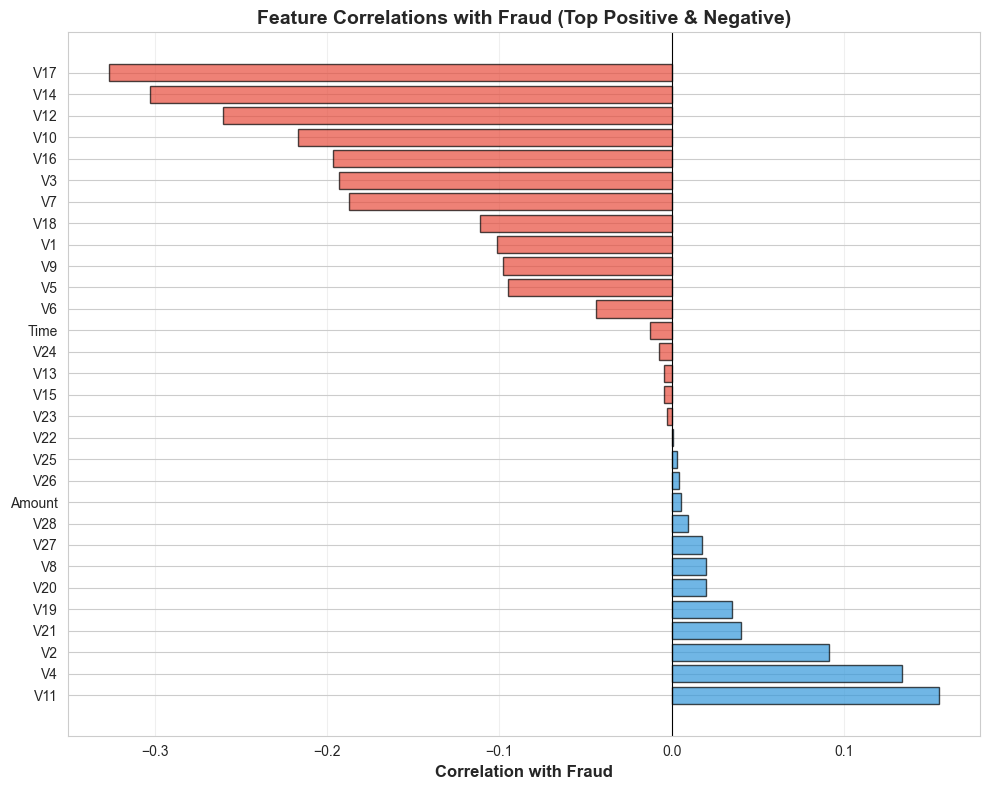


TOP 10 FEATURES POSITIVELY CORRELATED WITH FRAUD
(Higher values = More likely fraud)
V11      +0.154876  → Fraud has HIGHER V11 values
V4       +0.133447  → Fraud has HIGHER V4 values
V2       +0.091289  → Fraud has HIGHER V2 values
V21      +0.040413  → Fraud has HIGHER V21 values
V19      +0.034783  → Fraud has HIGHER V19 values
V20      +0.020090  → Fraud has HIGHER V20 values
V8       +0.019875  → Fraud has HIGHER V8 values
V27      +0.017580  → Fraud has HIGHER V27 values
V28      +0.009536  → Fraud has HIGHER V28 values
Amount   +0.005632  → Fraud has HIGHER Amount values

TOP 10 FEATURES NEGATIVELY CORRELATED WITH FRAUD
(Lower values = More likely fraud)
V9       -0.097733  → Fraud has LOWER V9 values
V1       -0.101347  → Fraud has LOWER V1 values
V18      -0.111485  → Fraud has LOWER V18 values
V7       -0.187257  → Fraud has LOWER V7 values
V3       -0.192961  → Fraud has LOWER V3 values
V16      -0.196539  → Fraud has LOWER V16 values
V10      -0.216883  → Fraud has LOWER V

In [18]:
# CHART 4: FEATURE CORRELATION ANALYSIS

# Since we have 31 features, let's look at correlations with Class
plt.figure(figsize=(10, 8))

# Get correlations with target
correlations = df.corr()['Class'].sort_values(ascending=False)

# Remove 'Class' from correlations before plotting
correlations_no_class = correlations.drop('Class')

# Plot top positive and negative correlations
top_features = pd.concat([correlations_no_class.head(15), correlations_no_class.tail(15)])
plt.barh(range(len(top_features)), top_features.values, 
         color=['#3498db' if x > 0 else '#e74c3c' for x in top_features.values],
         alpha=0.7, edgecolor='black')
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('Correlation with Fraud', fontsize=12, fontweight='bold')
plt.title('Feature Correlations with Fraud (Top Positive & Negative)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('../images/feature_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print("TOP 10 FEATURES POSITIVELY CORRELATED WITH FRAUD")
print("(Higher values = More likely fraud)")
print("="*70)
top_positive = correlations.head(11)[1:]  # Exclude 'Class' itself
for feature, corr_value in top_positive.items():
    print(f"{feature:8} {corr_value:+.6f}  → Fraud has HIGHER {feature} values")

print("\n" + "="*70)
print("TOP 10 FEATURES NEGATIVELY CORRELATED WITH FRAUD")
print("(Lower values = More likely fraud)")
print("="*70)
bottom_negative = correlations.tail(10)
for feature, corr_value in bottom_negative.items():
    print(f"{feature:8} {corr_value:+.6f}  → Fraud has LOWER {feature} values")

# Categorize features by strength (EXCLUDE Class from all categories)
correlations_no_class = correlations.drop('Class')  # Remove Class before categorizing

strong_features = correlations_no_class[correlations_no_class.abs() >= 0.30]
moderate_features = correlations_no_class[(correlations_no_class.abs() >= 0.10) & (correlations_no_class.abs() < 0.30)]
weak_features = correlations_no_class[(correlations_no_class.abs() >= 0.05) & (correlations_no_class.abs() < 0.10)]
very_weak_features = correlations_no_class[correlations_no_class.abs() < 0.05]

# Show feature strength breakdown
print("\n" + "="*70)
print("FEATURE STRENGTH BREAKDOWN")
print("="*70)
print(f"🔴 STRONG    (±0.30+):       {len(strong_features)} features")
print(f"🟡 MODERATE  (±0.10-0.30):   {len(moderate_features)} features")
print(f"🟢 WEAK      (±0.05-0.10):   {len(weak_features)} features")
print(f"⚪ VERY WEAK (<±0.05):       {len(very_weak_features)} features")

print("\n" + "="*70)
print("FRAUD DETECTION INTERPRETATION GUIDE")
print("="*70)
print(" POSITIVE correlation (+): When this feature is HIGH → suspect fraud")
print(" NEGATIVE correlation (-): When this feature is LOW → suspect fraud")
print(" Near ZERO (±0.00-0.05): Feature is NOT useful for fraud detection")
print("="*70)

print("\n" + "="*70)
print("QUICK SUMMARY - KEY INSIGHTS")
print("="*70)
print(f" Dataset structure: 31 total columns (30 features + 1 target)")
print(f" Features analyzed: {len(correlations) - 1} (Time, V1-V28, Amount)")
print(f" Target variable: Class (Fraud=1, Normal=0)")
print(f"\n Most predictive feature: {correlations.abs().sort_values(ascending=False).index[1]} (correlation: {correlations.abs().sort_values(ascending=False).values[1]:.4f})")
print(f" Usable features for modeling: {len(correlations[correlations.abs() >= 0.05]) - 1} out of {len(correlations) - 1}")
print("="*70)